In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import csv as csv
import math
from scipy import stats

%matplotlib inline  

# The questions:

    What is the relationship between different performance metrics? Do any have a strong negative or positive relationship? Do they not have a strong relationship?
         - As there are numerous statistics in baseball (which makes it a staticians' dream), in a limited timeframe we will focus on a select group of stats. We will focus on the following:
             - HR to AB relationship
             - SO to HR relationship
    What are the characteristics of baseball players with the highest salaries?
         - Similiary here, we will focus on Salary to a select number of performance statistics
         - Independent value: Salary
         - Dependent valuess: 
             - AVG
             - AB 
             - HHR
             - SO
    

### Other questions:
    Will changes in average salary over years be a concern for any salary analysis?

# Summary

In order to prepare for the questions, the first step taken was to merge the salary information and the batting information. In order to do this, we merged inner after seeing what the differences would be. The salary data has less information than the batting information. For example, the minimum year ID is 1985 while batting has a minimum year ID all the way back to 1871.

Then to answer the other questions we grouped by player ID as performance metrics and salary will be tied to them. As players have played different number of years and also salary has had an exponential growth compared to time, a more useful way would be to look at it by year and player ID. In order do this quickly, there is a formula that takes in the year to provide a filtered data source. In addition there is a formula that calculates when the highest and the lowest correlation occured for player ID information of one key to another.

To clean the data, we removed anyone who did not have an opportunity at bat as this will skew the data. stats from scipy was imported as well to calculate zscore and limit outliers.

For each of the comparisons,we graphed a standardized scatter plot and calculated correlation.

# Baseball Abreviation Meaings:
   Gotten information from [here](http://www.baseball-almanac.com/stats4.shtml).
    
    AB - at bats
    AVG - batting average
    H - hits
    HHR - homerun ratio
    HR - homerun
    R - runs
    RBI - run batted in 
    SB - stolen base
    CS  - caught stealing
    GIDP - double plays
    
    SF - sacrafise fly
    SH - sacrafise blunt
    BB - walks
    HBP - hit by pitch
    
    S - singles
    2B - doubles
    3B - triples
    SO - strikeouts
    
    SHO - shutouts
    W - wins
    L - losses
    SV - Saves
    GP - games played
    GS - games started
    IPS - innings per start
    IP - innings pitched
    IBB - intentional walks
    MB9 - base runners per 9 innings
    ER - Earned Runs
    ERA - Earned Runs Average
    
    HHR = HR/AB
    Batting average = hits / AB

In [8]:


#provides the following 'playerID', 'yearID', 'stint', 'teamID', 'lgID', 
#'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 
#'IBB', 'HBP', 'SH', 'SF', 'GIDP'
batting = pd.read_csv('Batting.csv')

#Provides 'yearID', 'teamID', 'lgID', 'playerID', 'salary'
salaries = pd.read_csv('Salaries.csv')


#gives 'playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 
#'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 
#'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID'
master = pd.read_csv('Master.csv')


In [248]:
#needed stat calculator for Batting Average
def avg_calc(df):
    #need an error checker to make sure we have the headings
    names = set(list(df))
    neededstats = {'AB', 'H'}
    
    if neededstats.issubset(names):
        AVG = df['H'].div(df['AB'])
        return(AVG)
    else:
        print("Needed stats not available")

# Data Validity and Wrangling

In [8]:
# When we do merge, there is a value called stint in batting that is not accounted for in
# salaries as a key ID, so we will remove it by grouping the data by the other key ID vlaues
battings = batting.fillna(0)
batting_nstint = battings.groupby(['playerID', 'yearID', 'teamID','lgID'], as_index=False).sum()


#There are still differences between the sizes of the dataframe
print("Data Frame Shape")
print(battings.shape)
print(salaries.shape)

# There are other differences. Even though these will be resolved by u858ng "inner" it was important 
# to figure out a few other differences. 
# One of the differences is that the only leagues in Salary are NL and AL
# Also the salaries only start from 1985 while the batting information goes all the way to 1871
print("\n")
print("A few differences:")
print(set(salaries['lgID']))
print(set(batting_nstint['lgID']))

print(salaries['yearID'].min())
print(batting_nstint['yearID'].min())

print(set(salaries['teamID']))
print(set(batting_nstint['teamID']))

Data Frame Shape
(101332, 22)
(25575, 5)


A few differences:
{'AL', 'NL'}
{0, 'FL', 'NL', 'AA', 'UA', 'PL', 'AL'}
1985
1871
{'PHI', 'BOS', 'TBA', 'MIL', 'CHA', 'SFN', 'SLN', 'ML4', 'KCA', 'NYA', 'CAL', 'CHN', 'TOR', 'WAS', 'NYN', 'CLE', 'HOU', 'ATL', 'BAL', 'MIN', 'FLO', 'LAA', 'OAK', 'SEA', 'LAN', 'ANA', 'COL', 'ARI', 'CIN', 'PIT', 'DET', 'MIA', 'TEX', 'MON', 'SDN'}
{'PHI', 'BLN', 'BL4', 'FW1', 'BOS', 'SL2', 'NY4', 'BRO', 'SFN', 'DTN', 'PH3', 'WS5', 'CHN', 'TOR', 'BLF', 'CLP', 'CHU', 'NYN', 'BLA', 'CL2', 'IN2', 'BL2', 'PH1', 'CNU', 'LS1', 'COL', 'MLU', 'SL5', 'BFN', 'MIA', 'IN1', 'SL1', 'WS4', 'ML3', 'HAR', 'BSN', 'SR2', 'CL1', 'BR3', 'BRP', 'SLN', 'RC2', 'CH1', 'ML4', 'SLF', 'BR4', 'CAL', 'KEO', 'PT1', 'WSU', 'WAS', 'PH2', 'CLE', 'SL4', 'RIC', 'HOU', 'IN3', 'PH4', 'RC1', 'CHP', 'KC2', 'KCU', 'TRO', 'WS2', 'BR1', 'LAA', 'SL3', 'LAN', 'SEA', 'LS2', 'BR2', 'CL4', 'CL5', 'CIN', 'NY3', 'TL2', 'WS6', 'ML1', 'BL1', 'LS3', 'SLA', 'NEW', 'BSP', 'PHN', 'BSU', 'MIL', 'BRF', 'WOR', 'KCA', 'TL1'

## Describe()

Some initial high level views into the data.

In [9]:

#batting_salary merges the data by battings already grouped by stint as salaries does not take into account stint 
# and salaries. 
# To keep consistency, this batting_salary data is what we will use as the base dataset
# This means we are only considering 
## NL and AL as the league ID
## 1985 and beyond as year ID
## {ML4', 'PIT', 'CLE', 'BAL', 'ANA', 'CHA', 'NYA', 'TOR', 'COL', 'LAA', 'MIN', 'ARI', 'DET', 'BOS', 'SFN', 'TBA', 
## SLN', 'ATL', 'SEA', 'PHI', 'SDN', 'WAS', 'LAN', 'CAL', 'CHN', 'NYN', 'HOU', 'TEX', 'FLO', 'MIL', 'MIA', 'MON', 
## 'CIN', 'OAK', 'KCA'} as teams
## and players which we can account for salaries as well
batting_salary = salaries.merge(batting_nstint, on=('playerID', 'yearID', 'teamID', 'lgID'), how='inner')

batting_salary['salary by thousand'] = batting_salary['salary']/1000


calc_AVG = avg_calc(batting_salary).replace([np.inf, -np.inf], np.nan).fillna(0)
batting_salary['AVG'] = calc_AVG

In [11]:
batting_salary.describe()

,yearID,salary,stint,G,AB,R,H,2B,3B,HR,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary by thousand,AVG
count,24617.000000,2.461700e+04,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,...,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000,24617.000000
mean,2000.419629,2.035886e+06,1.008206,67.844091,173.134460,23.362879,45.693139,8.821993,0.974245,5.104278,...,1.431978,16.959987,32.148556,1.447902,1.547995,1.660032,1.469229,3.914531,2035.886201,0.165301
std,8.626925,3.339016e+06,0.105184,47.586500,204.867015,31.099073,57.911908,11.764480,1.901581,8.666944,...,2.769899,23.839753,38.323630,3.320832,2.877266,2.867680,2.286273,5.403608,3339.016230,0.137334
min,1985.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,2.825000e+05,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.500000,0.000000
50%,2000.000000,5.600000e+05,1.000000,56.000000,64.000000,5.000000,11.000000,2.000000,0.000000,0.000000,...,0.000000,4.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,560.000000,0.210526
75%,2008.000000,2.300000e+06,1.000000,107.000000,331.000000,41.000000,85.000000,16.000000,1.000000,7.000000,...,2.000000,28.000000,54.000000,2.000000,2.000000,2.000000,2.000000,7.000000,2300.000000,0.266187
max,2015.000000,3.300000e+07,5.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,...,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.000000,33000.000000,1.000000


With such a difference in salary another question that would be interesting outside of the relationship of performance stats is the relationship of salary by year.

Also, the min of AB is 0, which may affect the data.

In [216]:
countofzero = batting_salary['AB'][batting_salary['AB'] != 0].shape[0]
print(countofzero)
print(str(countofzero/batting_salary['AB'].count()*100) + '%')

19237
78.1451842223%


This is a large volume which will affect our data. As a result we will be removing any entry that has an At Bat of zero.

In [217]:
batting_salary = batting_salary[batting_salary['AB'] != 0]

batting_salary.describe()

,yearID,salary,stint,G,AB,R,H,2B,3B,HR,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary by thousand,AVG
count,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.00000,19237.000000,19237.000000,19237.000000,19237.000000,...,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000
mean,2000.488122,2.241121e+06,1.006966,77.086084,221.554868,29.89489,58.472111,11.289234,1.246712,6.531788,...,1.832458,21.700421,41.139523,1.852836,1.980818,2.120601,1.880075,5.009305,2241.120652,0.211531
std,8.559731,3.605754e+06,0.095942,48.639667,207.317706,32.28633,59.536020,12.217093,2.070663,9.316649,...,3.014012,24.989133,38.853175,3.655399,3.120375,3.090109,2.432391,5.646337,3605.754046,0.119817
min,1985.000000,0.000000e+00,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,3.000000e+05,1.000000,33.000000,29.000000,2.00000,4.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.160000
50%,2000.000000,6.000000e+05,1.000000,70.000000,157.000000,18.00000,38.000000,7.000000,0.000000,2.000000,...,0.000000,13.000000,29.000000,0.000000,1.000000,1.000000,1.000000,3.000000,600.000000,0.241860
75%,2008.000000,2.600000e+06,1.000000,122.000000,403.000000,52.00000,106.000000,20.000000,2.000000,10.000000,...,3.000000,35.000000,66.000000,2.000000,3.000000,3.000000,3.000000,8.000000,2600.000000,0.275862
max,2015.000000,3.300000e+07,4.000000,163.000000,716.000000,152.00000,262.000000,59.000000,23.000000,73.000000,...,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.000000,33000.000000,1.000000


In [266]:
argmin = batting_salary['salary'].argmin()
playerIDsalaryzero = batting_salary.loc[argmin]['playerID']
print(batting_salary.loc[argmin]['yearID'])
playerinfo = master[master['playerID'] == playerIDsalaryzero]
print(playerinfo)

1993
       playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
8272  jamesdi01     1962.0        11.0       9.0          USA         PA   

         birthCity  deathYear  deathMonth  deathDay    ...     nameLast  \
8272  Philadelphia        NaN         NaN       NaN    ...        James   

     nameGiven weight height bats throws       debut   finalGame   retroID  \
8272      Dion  170.0   73.0    L      L  1983-09-16  1996-04-21  jamed001   

        bbrefID  
8272  jamesdi01  

[1 rows x 24 columns]


James Dion had a Disputed Salary for that year of 1993.

In [218]:

#Batting Salary data merged by various keys.
# @param batting_salary_by_playerID is by playerID
# @param batting_salary_by_yearID is by yearID
# @param batting_salary_by_yearID_lgID is by yearID and by lgID
# batting_salary_by_playerID will be used as our primary data frame
# both batting_salary_by_yearID and batting_salary_by_yearID_lgID will be used to observe if salary by year deviations

def sum_by_playerID(df):
    grouped = df.groupby('playerID', as_index = True)['salary', 'salary by thousand', 'G', 'AB', 'R', 'H', 
                                                                '2B', '3B', 'HR', 'RBI', 'SB', 
                                                                'CS', 'BB', 'SO', 'IBB', 'HBP', 
                                                                'SH', 'SF', 'GIDP'].sum()
    calc_AVG_playerID = avg_calc(grouped).replace([np.inf, -np.inf], np.nan).fillna(0)
    grouped['AVG'] = calc_AVG_playerID
    
    calc_HHR = grouped['HR']/grouped['H']
    calc_HHR = calc_HHR.replace([np.inf, -np.inf], np.nan).fillna(0)
    grouped['HRR'] = calc_HHR
    return(grouped)

batting_salary_by_playerID = sum_by_playerID(batting_salary)

batting_salary_by_yearID= batting_salary.groupby('yearID', as_index = False)['salary', 'salary by thousand', 'G', 'AB', 'R', 'H', 
                                                                '2B', '3B', 'HR', 'RBI', 'SB', 
                                                                'CS', 'BB', 'SO', 'IBB', 'HBP', 
                                                                'SH', 'SF', 'GIDP'].mean()


batting_salary_by_yearID_lgID= batting_salary.groupby(('yearID', 'lgID'), as_index = False)['salary', 'salary by thousand', 'G', 'AB', 'R', 'H', 
                                                                '2B', '3B', 'HR', 'RBI', 'SB', 
                                                                'CS', 'BB', 'SO', 'IBB', 'HBP', 
                                                                'SH', 'SF', 'GIDP'].mean()
#replacing batting average with proper calculations


One of the things that stand out is that the min of salaries equals 0. 

In [220]:
batting_salary_by_playerID.describe()

,salary,salary by thousand,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG,HRR
count,4.024000e+03,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,...,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,1.071383e+07,10713.826538,368.515159,1059.157803,142.914513,279.529821,53.968936,5.959990,31.225646,136.385189,...,8.760189,103.740308,196.670229,8.857604,9.469433,10.137674,8.987823,23.947316,0.189333,0.062835
std,2.424209e+07,24242.089952,476.041249,1750.405743,263.549124,491.442333,96.812111,12.456861,70.288311,259.339602,...,19.019827,201.965342,312.094379,24.606460,20.401575,17.889723,16.860236,42.919318,0.119176,0.085320
min,6.000000e+04,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.822250e+05,482.225000,57.000000,20.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117588,0.000000
50%,1.540750e+06,1540.750000,165.500000,199.500000,17.000000,38.000000,7.000000,0.000000,2.000000,16.000000,...,1.000000,12.000000,55.000000,0.000000,1.000000,3.000000,1.000000,3.000000,0.224620,0.038210
75%,8.250000e+06,8250.000000,478.000000,1331.500000,162.000000,340.250000,63.000000,6.000000,26.000000,148.000000,...,8.000000,114.000000,243.000000,7.000000,9.000000,12.000000,10.000000,28.000000,0.259224,0.105579
max,3.774163e+08,377416.252000,2986.000000,11147.000000,2227.000000,3453.000000,662.000000,124.000000,762.000000,2055.000000,...,202.000000,2558.000000,2478.000000,688.000000,285.000000,256.000000,117.000000,314.000000,1.000000,1.000000


There is also a lot outliers considering the difference in min to 25%. There is a nifty package that removes outliers with a zscore less than a certain value.

In [294]:
batting_salary_by_playerID_outliersout = batting_salary_by_playerID[(np.abs(stats.zscore(batting_salary_by_playerID)) < 2.33).all(axis=1)]

def zscore_outlier(data, zscore):
    removed = data[(np.abs(stats.zscore(data)) < zscore).all(axis=1)]
    return(removed)

batting_salary_by_playerID_outliersout.describe()

,salary,salary by thousand,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG,HRR
count,3.371000e+03,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,...,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.000000
mean,4.352269e+06,4352.269453,231.017799,552.265203,67.046870,138.333729,26.807772,2.826164,13.785227,64.924355,...,4.013349,49.511421,110.885494,3.669831,4.519134,6.601305,4.390685,12.499555,0.170766,0.051398
std,8.277525e+06,8277.525235,255.594450,851.566346,111.180203,226.308703,45.793458,5.224234,27.345164,112.192696,...,7.759103,86.028479,162.590881,8.129069,8.832962,9.797780,7.924354,21.434344,0.100347,0.062493
min,6.000000e+04,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.155000e+05,415.500000,52.000000,15.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097961,0.000000
50%,1.040000e+06,1040.000000,130.000000,136.000000,11.000000,23.000000,4.000000,0.000000,1.000000,9.000000,...,0.000000,7.000000,37.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.208589,0.022989
75%,4.088000e+06,4088.000000,311.500000,734.000000,88.000000,179.500000,33.000000,3.000000,14.000000,79.000000,...,4.000000,60.000000,145.000000,3.000000,5.000000,9.000000,5.000000,15.500000,0.250000,0.093546
max,6.610000e+07,66100.000000,1358.000000,4836.000000,715.000000,1380.000000,272.000000,34.000000,190.000000,686.000000,...,51.000000,565.000000,895.000000,66.000000,56.000000,51.000000,48.000000,123.000000,0.444444,0.260870


In [221]:
## calculating standard deviations of data frame

def stdev_calc_2d(df):
    df_mean = df.mean()
    df_std = df.std(ddof=0)
    return((df - df_mean)/df_std)

def stdev_calc_1D(array):
    array_mean = array.mean()
    array_std = df.std(ddof=0)
    return((array - array_mean)/array_std)
    

batting_salary_by_playerID_std = stdev_calc_2d(batting_salary_by_playerID)

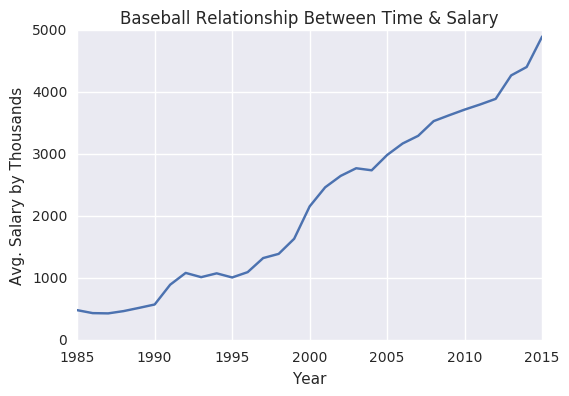

In [222]:
#plt by year
fig = plt.plot(batting_salary_by_yearID['yearID'], batting_salary_by_yearID['salary by thousand'])

plt.xlabel('Year')
plt.ylabel('Avg. Salary by Thousands')
plt.title('Baseball Relationship Between Time & Salary')

As we can see, salary has exponentially increased over the years.

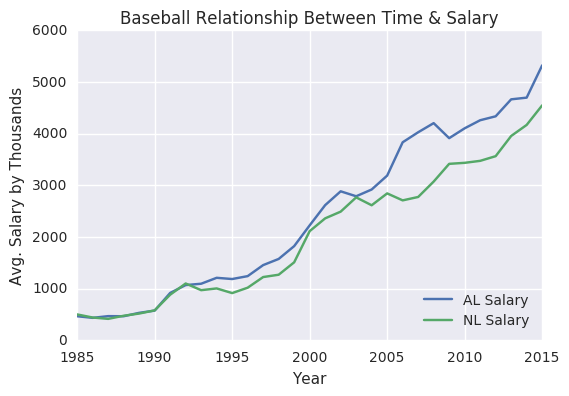

In [227]:
AL_db = batting_salary_by_yearID_lgID[batting_salary_by_yearID_lgID['lgID'] == 'AL']
NL_db = batting_salary_by_yearID_lgID[batting_salary_by_yearID_lgID['lgID'] == 'NL']

plt.plot(AL_db['yearID'], AL_db['salary by thousand'], label = "AL Salary")
plt.plot(NL_db['yearID'], NL_db['salary by thousand'], label = "NL Salary")

plt.xlabel('Year')
plt.ylabel('Avg. Salary by Thousands')
plt.title('Baseball Relationship Between Time & Salary')
plt.legend(loc = 4)

There isn't a large difference between AL and NL salary as they follow similiar trends.

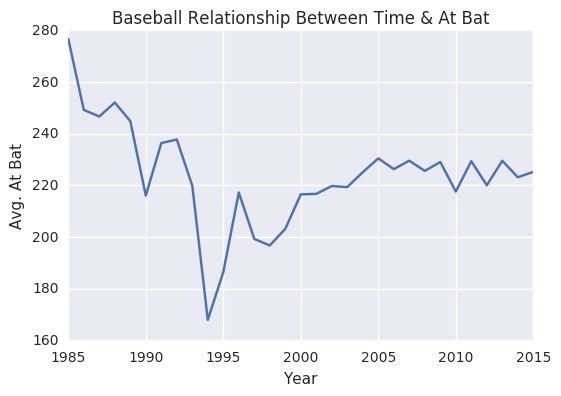

In [226]:
#plt by year
fig = plt.plot(batting_salary_by_yearID['yearID'], batting_salary_by_yearID['AB'])

plt.xlabel('Year')
plt.ylabel('Avg. At Bat')
plt.title('Baseball Relationship Between Time & At Bat')

There is no exponential increases in performance stats like those seen in salary.

In [295]:
# Due to the difference, it would be important also to take a look at the data by certain years as well
# As it would be nice to look at several years the formula givenyear provides the data by specif years only


def givenyear(data, year):
    yeardata = data[data['yearID'] == year]
    return yeardata


#The representative year can be 2015
batting_salary_2015 = givenyear(batting_salary, 2015)
batting_salary_playerID_2015 = sum_by_playerID(batting_salary_2015)
batting_salary_playerID_2015 = zscore_outlier(batting_salary_playerID_2015, 3)
batting_salary_playerID_2015_std = stdev_calc_2d(batting_salary_playerID_2015)

#In addition instead of calculating every correlation individually and removes outliers at the same time
def correlation_by_playerID_year(year, key, key1):
    data = sum_by_playerID(givenyear(batting_salary, year))
    data = zscore_outlier(data, 3)
    print('The correlation coefficient for the year '+ str(year) + ' and for ' + key + ' and ' + key1 + ' is ' + 
          str(np.corrcoef(data[key], data[key1])[1][0]) + '\n')

def correlation_by_playerID_year_return(year, key, key1):
    data = sum_by_playerID(givenyear(batting_salary, year))
    data = zscore_outlier(data, 2.33)
    return(np.corrcoef(data[key], data[key1])[1][0])
    
#to check the formula
correlation_by_playerID_year(2015, 'AB', 'salary')

#To also check the lowest and highest year with any correlation as a printed value
# lowest year: year
# highest year: year
#which gives us the max and min correlation

def low_high_years_playerID(key, key1):
    firstval = True
    for year in set(batting_salary['yearID']):
        corr = correlation_by_playerID_year_return(year, key, key1)
        if firstval:
            maxyearcorr = corr
            minyearcorr = corr
            minyear = str(year)
            maxyear = str(year)
            firstval = False
        else:
            if corr == minyearcorr:
                minyear = minyear + ' and ' + str(year)
                minyearcorr = corr
            if corr == maxyearcorr:
                maxyear = maxyear + ' and ' + str(year)
            if corr < minyearcorr:
                minyear = str(year)
                minyearcorr = corr
            if corr > maxyearcorr:
                maxyear = str(year)
                maxyearcorr = corr
    return('The lowest year: ' + minyear + ' with corr of ' + str(minyearcorr) +'\n'+
          'The highest year: ' + maxyear + ' with corr of ' + str(maxyearcorr))

#an example of how low_high_years_layerID works
print(low_high_years_playerID('H', 'salary'))

The correlation coefficient for the year 2015 and for AB and salary is 0.174398281003

The lowest year: 2012 with corr of 0.0587092397446
The highest year: 1996 with corr of 0.282580189374


In [296]:
batting_salary_2015.describe()

,yearID,salary,stint,G,AB,R,H,2B,3B,HR,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary by thousand,AVG
count,606.0,6.060000e+02,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,...,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,2015.0,4.900516e+06,1.003300,76.138614,225.201320,28.252475,57.673267,11.270627,1.221122,6.744224,...,1.443894,19.466997,49.323432,1.415842,2.202970,1.460396,1.750825,5.212871,4900.516243,0.200772
std,0.0,5.958737e+06,0.057401,50.658317,211.115101,30.084629,58.846731,11.958856,1.976879,9.171223,...,2.405088,22.672692,45.252215,2.871118,3.413642,2.311505,2.303205,6.018366,5958.736702,0.121992
min,2015.0,5.070000e+05,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,507.000000,0.000000
25%,2015.0,5.254172e+05,1.000000,31.000000,27.250000,1.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,525.417250,0.143506
50%,2015.0,2.250000e+06,1.000000,67.000000,173.000000,18.000000,41.500000,7.000000,0.000000,3.000000,...,0.000000,11.000000,36.000000,0.000000,1.000000,0.000000,1.000000,3.000000,2250.000000,0.229602
75%,2015.0,7.300000e+06,1.000000,126.000000,410.500000,51.000000,106.000000,20.000000,2.000000,11.000000,...,2.000000,31.000000,82.000000,1.750000,3.000000,2.000000,3.000000,9.000000,7300.000000,0.267413
max,2015.0,3.257100e+07,2.000000,162.000000,638.000000,122.000000,205.000000,45.000000,12.000000,47.000000,...,20.000000,143.000000,208.000000,29.000000,30.000000,14.000000,11.000000,28.000000,32571.000000,1.000000


# Interesting notes

There is a player with intential 232 walks in a single year! And a player who has a career walks of 2,558.

The std is larger than the mean for salary (or salary by thousand) showing that it is positively skewed (considering there are also no negative numbers for salary). This is also true for At Bats, HR, BB, and  all other features.

The average salary has increased over the years which will need to be accounted for when we think of performance to salary, as the average at bat stat, which is the average each player is up for the bat is relativly even. There is also a pretty even distribution of mean salary between AL and NL. 

# Other

There are batting averages that are equal to 0 and some that are equal to 1 according to the min and max.

In [278]:
stellar_avg = batting_salary[batting_salary['AVG'] == 1]
print(stellar_avg['AB'].describe())
print("\n" + str(stellar_avg['AB'].count()/batting_salary['AB'].count()*100) + "% of entries")

count    94.000000
mean      1.095745
std       0.330173
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: AB, dtype: float64

0.488641680096% of entries


In [231]:
bad_avg = batting_salary[batting_salary['AVG'] == 0]
print(bad_avg['AB'].describe())
print("\n" + str(bad_avg['AB'].count()/batting_salary['AB'].count()*100) + "% of entries")

count    2610.000000
mean        3.322605
std         3.735422
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        40.000000
Name: AB, dtype: float64

13.5676040963% of entries


In [233]:
# To double check that there are no others
bad_avg_set = set(bad_avg['AB'])
print(bad_avg_set)

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 28.0, 30.0, 31.0, 32.0, 33.0, 37.0, 38.0, 40.0}


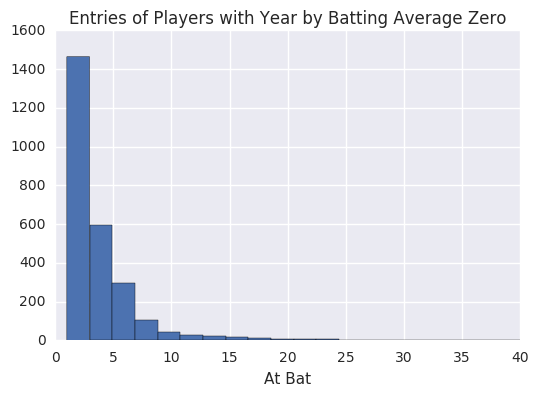

In [234]:

bad_avg_hist = plt.hist(bad_avg['AB'], bins = 20)


plt.xlabel('At Bat')
plt.title('Entries of Players with Year by Batting Average Zero')

Overall there are out of 24617 entries, there are 94 superb batting averages which only accounts for 0.49% entries. Also those players have not had many games as the max of at bats was 3. 

Out of the 24617 entries, there are quite a few bad batting averages with 13.57% having at least one opportunity to be at bat; however, if we observe the histogram many of these players for that year did not have many opportunities to improve their batting average as the data is positively skewed.

# Baseball Stats Comparison

The question for HR and AB: will giving more opportunity to players to be at the bat increase home runs?

In terms of causation, we cannot say directly as it could be that players who are likely hit HRs are possibly given more At Bats. 

In [235]:
#HR to AB Differences
print(batting_salary_by_playerID['HR'].describe())
print('\n')
print(batting_salary_by_playerID['AB'].describe())

count    4024.000000
mean       31.225646
std        70.288311
min         0.000000
25%         0.000000
50%         2.000000
75%        26.000000
max       762.000000
Name: HR, dtype: float64


count     4024.000000
mean      1059.157803
std       1750.405743
min          1.000000
25%         20.000000
50%        199.500000
75%       1331.500000
max      11147.000000
Name: AB, dtype: float64


The correlation coefficient for AB and HR is 0.871581576077

The data is highly correlated.


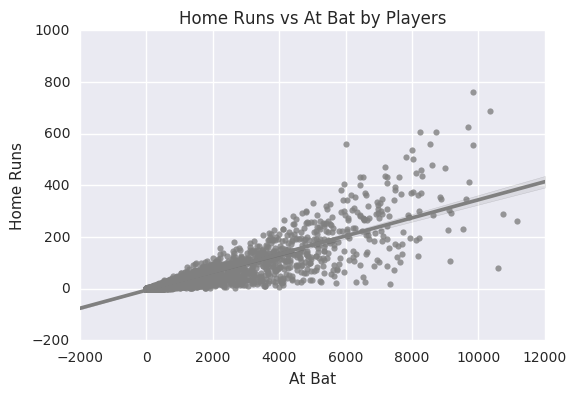

In [236]:
HR_AB_line = sb.regplot(batting_salary_by_playerID['AB'], batting_salary_by_playerID['HR'], color = 'grey')


plt.xlabel('At Bat')
plt.ylabel('Home Runs')
plt.title('Home Runs vs At Bat by Players')

#We will be likely to report correlation frequently
def give_corr(key, key2, data):
    print('The correlation coefficient for ' + key + ' and ' + key2 + ' is ' + 
          str(np.corrcoef(data[key], data[key2])[1][0]) + '\n')

give_corr('AB', 'HR', batting_salary_by_playerID)
print('The data is highly correlated.')

To normalize the graph. We'll calculate the values in standard deviations away from the mean.

The correlation coefficient for AB and HR is 0.871581576077



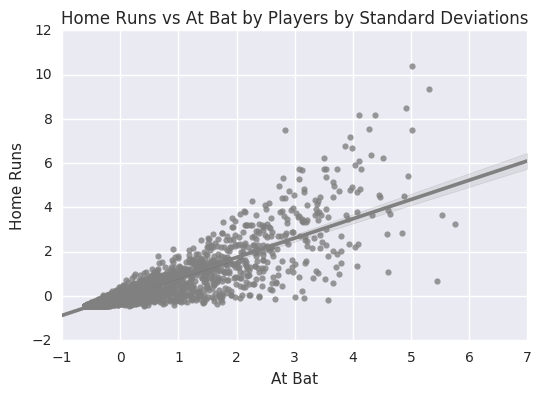

In [237]:
#change data 
HR_AB_line = sb.regplot(batting_salary_by_playerID_std['AB'], batting_salary_by_playerID_std['HR'], color = 'grey')


plt.xlabel('At Bat')
plt.ylabel('Home Runs')
plt.title('Home Runs vs At Bat by Players by Standard Deviations')

give_corr('AB', 'HR', batting_salary_by_playerID_std)

With a correlation coefficient of 0.8716 we can say that there is a strong positive correlation to At Bat and Home Runs. In addition to see if there are any correlation to hitting, 3B, or 2B to HR:

In [279]:
give_corr('H', 'HR', batting_salary_by_playerID)
give_corr('3B', 'HR', batting_salary_by_playerID)
give_corr('2B', 'HR', batting_salary_by_playerID)

The correlation coefficient for H and HR is 0.871442113487

The correlation coefficient for 3B and HR is 0.58826327248

The correlation coefficient for 2B and HR is 0.889849492923



We can see there is a correlation with Hits to HR and doubles to HR; however, the relationship between triples to HR are not as correlated.

The second question is asking what the correlation is between Home Runs and Strikeouts. Before answering  with answering this question, we'll still calculate the correlation between singles, doubles, triples and homeruns.

The correlation coefficient for SO and HR is 0.909367092313



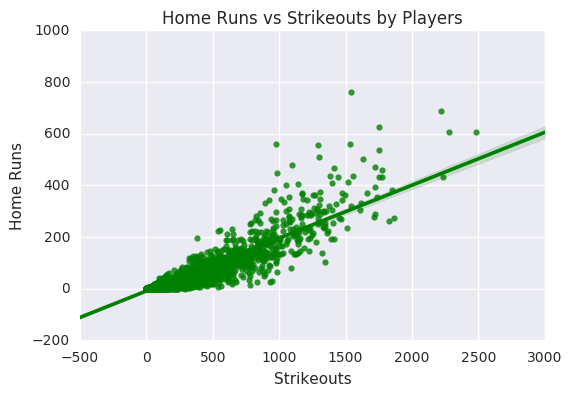

In [239]:
give_corr('SO', 'HR', batting_salary_by_playerID)


HR_AB_line = sb.regplot(batting_salary_by_playerID['SO'], batting_salary_by_playerID['HR'], color = 'green')


plt.xlabel('Strikeouts')
plt.ylabel('Home Runs')
plt.title('Home Runs vs Strikeouts by Players')

To normalize the graph above, we will calculate values by standard deviations from the mean. There does seem to be a correlation though.

The correlation coefficient for SO and HR is 0.909367092313



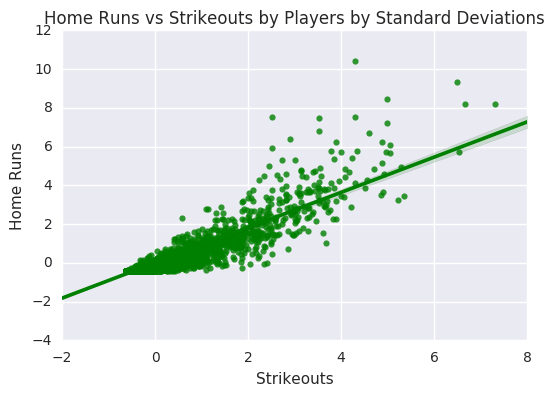

In [240]:
give_corr('SO', 'HR', batting_salary_by_playerID_std)


HR_AB_line = sb.regplot(batting_salary_by_playerID_std['SO'], batting_salary_by_playerID_std['HR'], color = 'green')


plt.xlabel('Strikeouts')
plt.ylabel('Home Runs')
plt.title('Home Runs vs Strikeouts by Players by Standard Deviations')

This was interesting to see as there is an extremely strong correlation to Strikeouts with Home Runs. A potential *hypothesis* could be that those who hit Home Runs consider the value to outweigh the potential of striking out and as a result take riskier attempts to hit. 

# Relationship of Salaries to Performance

Independent value: Salary
         - Dependent valuess: 
             - AB
             - S0
             - AVG 
             - HHR

The first will be looking at if players who have a high salary are likely to be given more times at bat in terms of correlation. Also to reiterate why we want to see the data by a specific year the first two graphs show the correlation of Salaries vs At Bat by Players (all years) for all years and one which only looks at 2015. In the first, the correlation of Salaries and At Bat by Players (all years) is greater than Salaries and At Bat by Players (2015).

The correlation coefficient for salary and AB is 0.454267118893



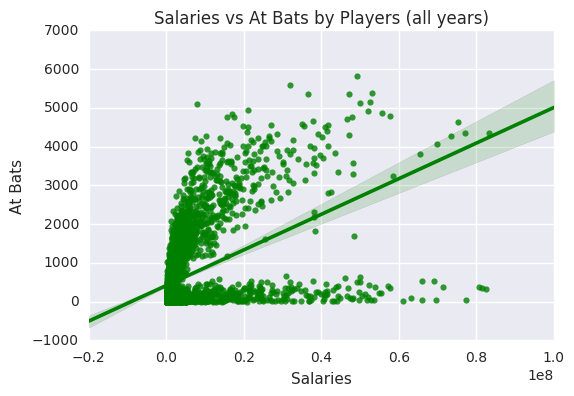

In [281]:
give_corr('salary', 'AB', batting_salary_by_playerID_outliersout)


HR_AB_line = sb.regplot(batting_salary_by_playerID_outliersout['salary'], batting_salary_by_playerID_outliersout['AB'], color = 'green')


plt.xlabel('Salaries')
plt.ylabel('At Bats')
plt.title('Salaries vs At Bats by Players (all years)')

The graph above shows not a strong correlation, but a correlation higher than the one below which only shows one year. The differences in salary per year is slightly skewing the data.

The correlation coefficient for salary and AB is 0.174398281003



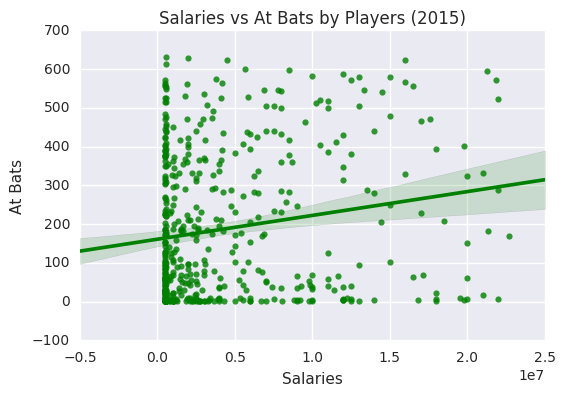

In [288]:
give_corr('salary', 'AB', batting_salary_playerID_2015)


HR_AB_line = sb.regplot(batting_salary_playerID_2015['salary'], batting_salary_playerID_2015['AB'], color = 'green')


plt.xlabel('Salaries')
plt.ylabel('At Bats')
plt.title('Salaries vs At Bats by Players (2015)')

Here we see that there is not a strong correlation between Salary and At Bat opportunities.

The correlation coefficient for the year 2015 and for salary and AB is 0.174398281003



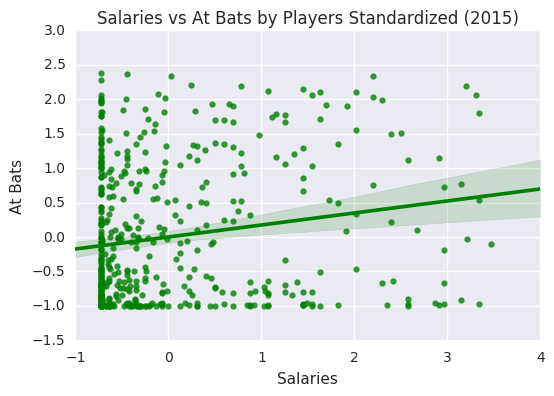

Other years:

The correlation coefficient for the year 2014 and for salary and AB is 0.206696071325

The correlation coefficient for the year 2013 and for salary and AB is 0.138682532759

The correlation coefficient for the year 2012 and for salary and AB is 0.109794245492

The lowest year: 2012 with corr of 0.109794245492
The highest year: 1996 with corr of 0.341068968284


In [289]:
correlation_by_playerID_year(2015, 'salary', 'AB')


HR_AB_line = sb.regplot(batting_salary_playerID_2015_std['salary'], batting_salary_playerID_2015_std['AB'], color = 'green')


plt.xlabel('Salaries')
plt.ylabel('At Bats')
plt.title('Salaries vs At Bats by Players Standardized (2015)')
plt.show()

print('Other years:\n')
correlation_by_playerID_year(2014, 'salary', 'AB')
correlation_by_playerID_year(2013, 'salary', 'AB')
correlation_by_playerID_year(2012, 'salary', 'AB')
print(low_high_years_playerID('salary', 'AB'))

Even the year with the highest correlation at 1996 is not strongly correlated. This shows that in terms of how players are ordered for bat is not correlated with salary.

The question then is in terms of how players by salary performed according to performance stats when players are at bat. To look at correlations we will look at Strike Outs, Batting Average, and Home Run Rates.

The correlation coefficient for the year 2015 and for salary and SO is 0.117942066528



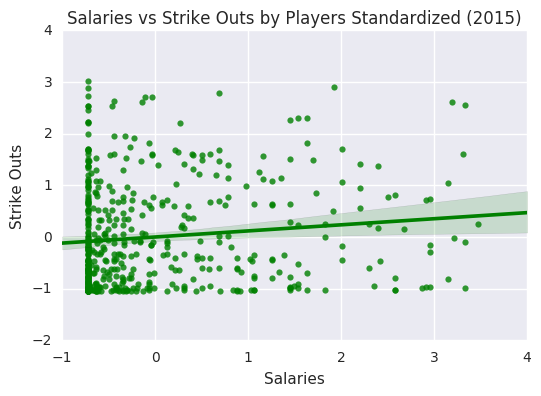

Other years:

The correlation coefficient for the year 2014 and for salary and SO is 0.175067445836

The correlation coefficient for the year 2013 and for salary and SO is 0.124982748953

The correlation coefficient for the year 2012 and for salary and SO is 0.0840243768745

The lowest year: 2012 with corr of 0.0840243768745
The highest year: 1996 with corr of 0.285613040299


In [290]:
correlation_by_playerID_year(2015, 'salary', 'SO')


HR_AB_line = sb.regplot(batting_salary_playerID_2015_std['salary'], batting_salary_playerID_2015_std['SO'], color = 'green')


plt.xlabel('Salaries')
plt.ylabel('Strike Outs')
plt.title('Salaries vs Strike Outs by Players Standardized (2015)')
plt.show()

print('Other years:\n')
correlation_by_playerID_year(2014, 'salary', 'SO')
correlation_by_playerID_year(2013, 'salary', 'SO')
correlation_by_playerID_year(2012, 'salary', 'SO')
print(low_high_years_playerID('salary', 'SO'))

In Strike Outs as well there is not a strong correlation, as even the year with the highest correlation at 1997 is not strongly correlated.

The next is in terms of performance by Batting Average.

The correlation coefficient for the year 2015 and for salary and AVG is 0.110957139163



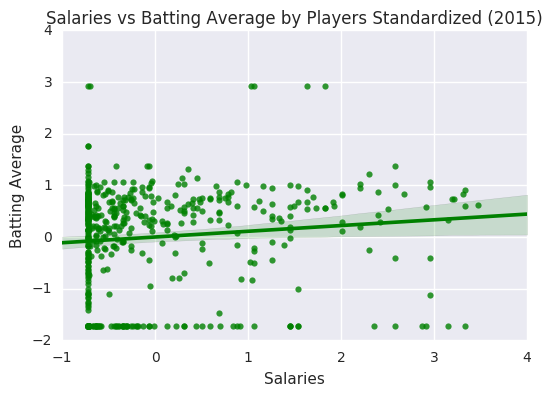

Other years:

The correlation coefficient for the year 2014 and for salary and AVG is 0.107802621758

The correlation coefficient for the year 2013 and for salary and AVG is -0.00443548944515

The correlation coefficient for the year 2012 and for salary and AVG is 0.0585088075517

The lowest year: 2013 with corr of -0.00443548944515
The highest year: 1996 with corr of 0.156923625869


In [291]:
correlation_by_playerID_year(2015, 'salary', 'AVG')


HR_AB_line = sb.regplot(batting_salary_playerID_2015_std['salary'], batting_salary_playerID_2015_std['AVG'], color = 'green')


plt.xlabel('Salaries')
plt.ylabel('Batting Average')
plt.title('Salaries vs Batting Average by Players Standardized (2015)')
plt.show()

print('Other years:\n')
correlation_by_playerID_year(2014, 'salary', 'AVG')
correlation_by_playerID_year(2013, 'salary', 'AVG')
correlation_by_playerID_year(2012, 'salary', 'AVG')
print(low_high_years_playerID('salary', 'AVG'))

This was especially interesting as the correlation for even between Batting Averages was low compared as well there is not a strong correlation, as even the year with the highest correlation at 2002 is not strongly correlated.

The next is in terms of performance by Home Runs.

The correlation coefficient for the year 2015 and for salary and HR is 0.224222425708



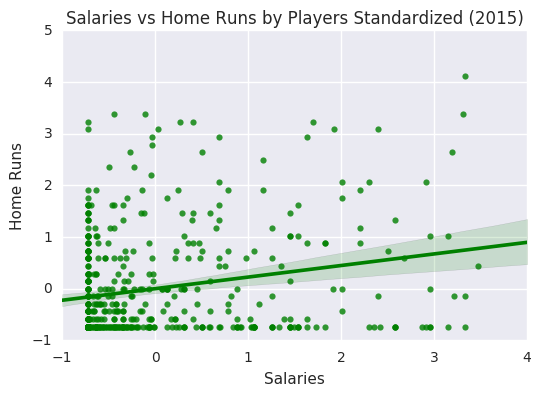

Other years:

The correlation coefficient for the year 2014 and for salary and HR is 0.207483155415

The correlation coefficient for the year 2013 and for salary and HR is 0.200628382361

The correlation coefficient for the year 2012 and for salary and HR is 0.150035530778

The lowest year: 2011 with corr of 0.132796504731
The highest year: 1991 with corr of 0.354385226909


In [292]:
correlation_by_playerID_year(2015, 'salary', 'HR')


HR_AB_line = sb.regplot(batting_salary_playerID_2015_std['salary'], batting_salary_playerID_2015_std['HR'], color = 'green')


plt.xlabel('Salaries')
plt.ylabel('Home Runs')
plt.title('Salaries vs Home Runs by Players Standardized (2015)')
plt.show()

print('Other years:\n')
correlation_by_playerID_year(2014, 'salary', 'HR')
correlation_by_playerID_year(2013, 'salary', 'HR')
correlation_by_playerID_year(2012, 'salary', 'HR')
print(low_high_years_playerID('salary', 'HR'))

In all the years we can see that there is not a strong correlation between salary and home runs as well.

The correlation coefficient for the year 2015 and for salary and HRR is 0.0962197541312



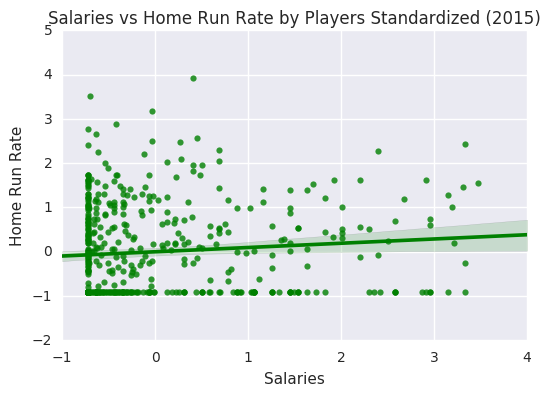

Other years:

The correlation coefficient for the year 2014 and for salary and HRR is 0.0780377664534

The correlation coefficient for the year 2013 and for salary and HRR is 0.0587763345756

The correlation coefficient for the year 2012 and for salary and HRR is 0.0821301728372

The lowest year: 2011 with corr of 0.033023553557
The highest year: 2002 with corr of 0.217652516137


In [293]:
correlation_by_playerID_year(2015, 'salary', 'HRR')


HR_AB_line = sb.regplot(batting_salary_playerID_2015_std['salary'], batting_salary_playerID_2015_std['HRR'], color = 'green')


plt.xlabel('Salaries')
plt.ylabel('Home Run Rate')
plt.title('Salaries vs Home Run Rate by Players Standardized (2015)')
plt.show()

print('Other years:\n')
correlation_by_playerID_year(2014, 'salary', 'HRR')
correlation_by_playerID_year(2013, 'salary', 'HRR')
correlation_by_playerID_year(2012, 'salary', 'HRR')
print(low_high_years_playerID('salary', 'HRR'))

This carries through to the Home Run Rate as in this case as well: in all the years we can see that there is not a strong correlation between salary and home run rates.

This was interesting to see that there was a lack of correlation between salary and batting performance.

# Conclusion

Some of the assumptions we made are that we excluded those who have not been at bat for certain years, as this will skew the data more towards 0, as the At Bat is a prerequisite for many other statistics. In order to reduce outliers, we used stats from scipy with the formula zscore to calculate the zscore and make sure that it is within a certain threshold. With a z-score of (-2.33,2.33) gives a the volume of 98.02% centered around the mean.

Potential errors that can occur are the numerous lurking variables that can be affecting the data, as the data we looked at only contained *batting* and *salary*. For example, pitiching performance or defensive performance could have affected the data. In that case, if we hypothesized that players were paid more based on batting, this could be true, but with the correlation we could have proved the null instead. If we removed pitchers, there may be a different story.

Also, throughout this, the calculations were correlations and not causation calculations. To conclude that the salary was a cause or other performance statistics were a cause for the others would be invalid. 

### Salary Insights

Salary has been on the rise. What was not taken into consideration is inflation or cost of living; however, as an hypothesis, there is likely still an increase in salary. 

There is also not too much of a difference between salary between NL and AL.

### Performance Statistic Relationship

There is a strong correlation to At Bat and Home Runs as well as a relationship between Home Runs and Strike Outs. These are not causations to reiterate. For example, this does not mean that trying for more Home Runs means that one will automatically strike out more or vice versa. It is that there is an observed relationship between the two.

### Salary to Performance Relationship

There is not as much correlation in terms of performance with salary and many of the performance statistics that are at bat even when we exclude those who have not at bat. This may be due to the fact that people are paid not only based on at bat performance.

### Next Steps

To take this another step further, there could be a third layer applied to salary and performance statistics relationship, which is player position. 